<a href="https://colab.research.google.com/github/TonyChen91/KerasTensorflow/blob/main/keras_mnist_MLP_lv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**此版本的MLP模型相較lv.1版本使用了dropout和更多層的隱藏層**

In [ ]:
import tensorflow as tf
import keras
tf.__version__
keras.__version__

'2.12.0'

In [ ]:
import numpy as np #維度陣列和矩陣運算
import pandas as pd
from keras.utils import np_utils
np.random.seed(10) #之後的random值都會固定，偽隨機

In [ ]:
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label)=mnist.load_data()
# import os
# cache_dir = os.path.expanduser('~/.keras/datasets/')
# print(cache_dir) 可知文件(mnist.npz)現在被下載到/root/.keras/datasets底下

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("下載到的訓練資料有", len(x_train_image), len(y_train_label))
print("測試資料有" ,len(x_test_image), len(y_test_label))
print("x_train_image:",x_train_image.shape) # 代表是一个三维数组，形状是(60000,28,28), 28*28px
print("y_train_label:",y_train_label.shape)
print("x_test_image:",x_test_image.shape)
print("y_test_label:",y_test_label.shape)

下載到的訓練資料有 60000 60000
測試資料有 10000 10000
x_train_image: (60000, 28, 28)
y_train_label: (60000,)
x_test_image: (10000, 28, 28)
y_test_label: (10000,)


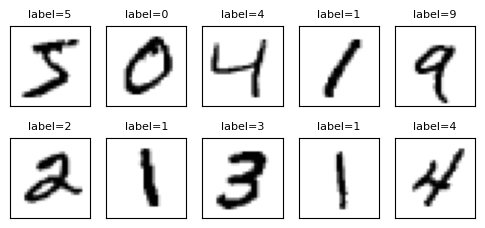

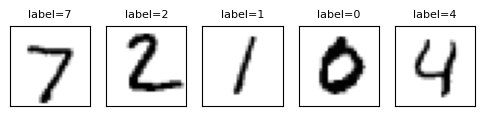

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig=plt.gcf()
  fig.set_size_inches(6,7)#整個大圖的尺寸
  if num>25: #num=畫幾個小圖最多12
    num=12
  for i in range(0, num):
    ax=plt.subplot(5,5,1+i) #子圖形五行五列 第幾個 如果寫num-i會倒過來
    ax.imshow(images[idx],cmap="binary")
    title="label="+str(labels[idx])
    if len(prediction)>0: #如果有預測值放上去顯示
      title+=",pred="+str(prediction[idx])
    ax.set_title(title,fontsize=8)
    ax.set_xticks([]) #不顯示刻度
    ax.set_yticks([])
    idx+=1
  plt.show()
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)
print("")
plot_images_labels_prediction(x_test_image,y_test_label,[],0,5)


In [ ]:
x_Train=x_train_image.reshape(60000,28*28).astype("float32")
x_Test=x_test_image.reshape(10000,28*28).astype("float32")
print("x_train_image:",x_train_image.shape)
print("x_Train:",x_Train.shape) #x_Train現在變成一維的資料 零維是共60000筆
# print(x_Train[0])

x_Train_normalize=x_Train/255 #將色彩標準化讓值都在0~1
x_Test_normalize=x_Test/255
# print(x_Test_normalize[0])

x_train_image: (60000, 28, 28)
x_Train: (60000, 784)


In [ ]:
y_Train=np_utils.to_categorical(y_train_label)
y_Test=np_utils.to_categorical(y_test_label)
print(y_train_label[0:5])
print(y_Train[0:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


隱藏層增加為1000神經元、多一層隱藏層、使用Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model=Sequential() #建立一個線性堆疊模型
model.add(Dense(units=1000,input_dim=784,kernel_initializer="normal",activation="relu")) #建立輸入層和隱藏層
#units代表隱藏層給定多少的神經元
#input_dim代表輸入層給定多少的神經元(因為28*28px所以就給784)
#normal代表亂數使用常態分布去給初始化的權重和偏差
#relu代表激活下一個神經的概念
model.add(Dropout(0.5))
#Dropout讓每次訓練迭代時隨機放棄50%的隱藏層神經元
model.add(Dense(units=1000,kernel_initializer="normal",activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer="normal",activation="softmax"))
#這一層的input_dim自動是上一層的256
#units代表最後的輸出層給定10的神經元
#softmax將神經元的輸出轉換成"預測機率"
print(model.summary())
#param代表超參數 784*256+256=200960 256*10+10=2570 整個model的param即是兩者相加
#一個模型愈複雜代表其param愈大，訓練時間也需要愈久

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) #定義此模型的訓練方式
train_history=model.fit(x=x_Train_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=200,verbose=2)#訓練
#validation_split=0.2會將傳入的資料(x.y)分成80%拿去訓練20%拿去驗證
#batch_size=200代表每一批次有200資料
#epochs=10代表執行10次訓練週期
#verbose=2代表顯示訓練過程
#因此傳入60000資料有48000拿去訓練,每一批次200資料因此同時跑240批次一次epoch

Epoch 1/10
240/240 - 32s - loss: 0.3684 - accuracy: 0.8854 - val_loss: 0.1247 - val_accuracy: 0.9625 - 32s/epoch - 133ms/step
Epoch 2/10
240/240 - 21s - loss: 0.1652 - accuracy: 0.9490 - val_loss: 0.1077 - val_accuracy: 0.9666 - 21s/epoch - 89ms/step
Epoch 3/10
240/240 - 19s - loss: 0.1266 - accuracy: 0.9601 - val_loss: 0.0905 - val_accuracy: 0.9728 - 19s/epoch - 78ms/step
Epoch 4/10
240/240 - 17s - loss: 0.0963 - accuracy: 0.9689 - val_loss: 0.0809 - val_accuracy: 0.9766 - 17s/epoch - 70ms/step
Epoch 5/10
240/240 - 17s - loss: 0.0841 - accuracy: 0.9739 - val_loss: 0.0821 - val_accuracy: 0.9759 - 17s/epoch - 69ms/step
Epoch 6/10
240/240 - 18s - loss: 0.0759 - accuracy: 0.9764 - val_loss: 0.0754 - val_accuracy: 0.9771 - 18s/epoch - 74ms/step
Epoch 7/10
240/240 - 18s - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.0755 - val_accuracy: 0.9783 - 18s/epoch - 74ms/step
Epoch 8/10
240/240 - 16s - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0715 - val_accuracy: 0.9800 - 16s/epoch - 68ms/step

**可見Train和Valid的accuracy相近，已經解決過擬合的問題了**

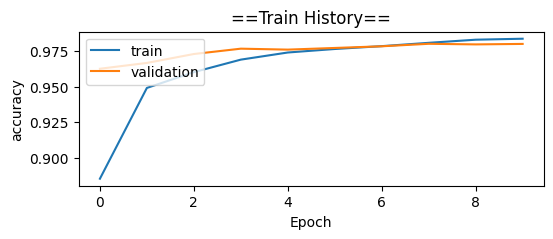

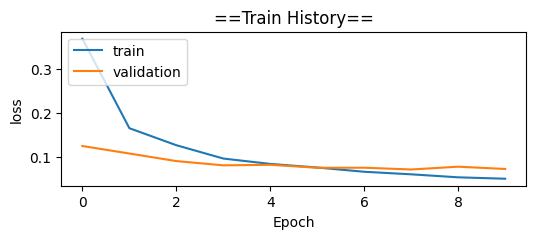

In [ ]:
def show_train_history(train_history,train,validation):
  plt.figure(figsize=(6,2))
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title("==Train History==")
  plt.ylabel(train)
  plt.xlabel("Epoch")
  plt.legend(["train","validation"],loc="upper left")
  plt.show()
show_train_history(train_history,"accuracy","val_accuracy")
show_train_history(train_history,"loss","val_loss")

In [ ]:
scores=model.evaluate(x_Test_normalize,y_Test) #快速評估模型對test_data的預測能力
print(scores)

313/313 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9817
[0.06091999635100365, 0.9817000031471252]


313/313 [==============================] - 3s 11ms/step
[0.         0.         0.         0.99999994 0.         0.
 0.         0.         0.         0.        ]
[3 6 1 3 8 1 0 5 1 3]


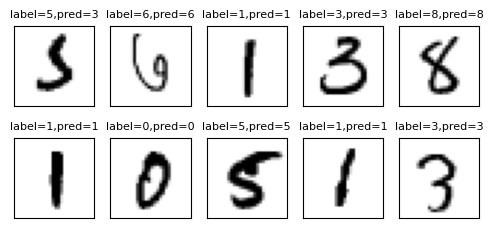

In [ ]:
prediction=model.predict(x_Test) #預測會返回包含预测概率的数组
print(prediction[340])
predicted_classes = np.argmax(prediction, axis=1) #每个预测概率数组中找到最大值的index
print(predicted_classes[340:350]) #340~349十個預測值
plot_images_labels_prediction(x_test_image,y_test_label,predicted_classes,idx=340)

In [ ]:
pd.crosstab(y_test_label,predicted_classes,rownames=["label"],colnames=["predict"]) #第一個參數是label,第二個是預測
#crosstab會去對前兩個參數(a,b)並塞到對應的表格上

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,1,1,2,1,0,3,1,2,1
1,0,1130,1,1,0,0,1,0,2,0
2,0,0,1017,2,2,0,1,8,2,0
3,0,0,2,997,0,3,0,4,0,4
4,0,1,5,1,953,0,3,3,0,16
5,2,0,1,13,0,869,2,0,1,4
6,1,3,1,1,4,5,941,0,2,0
7,0,4,4,2,0,0,0,1013,0,5
8,1,1,4,17,4,4,1,2,935,5


In [ ]:
df=pd.DataFrame({"label":y_test_label,"predict":predicted_classes})
df[340:350].transpose() #第340~350資料的label值和predict值 #.transpose()可以讓它變成橫的

,340,341,342,343,344,345,346,347,348,349
label,5,6,1,3,8,1,0,5,1,3
predict,3,6,1,3,8,1,0,5,1,3


In [ ]:
df[(df.label==5)&(df.predict==3)].transpose() #尋找所有label=5但預測卻是3的值 #先前crosstab顯示應該要有九個

,340,1393,2035,2291,2369,2597,2810,3702,4355,4360,5937,5972,8502
label,5,5,5,5,5,5,5,5,5,5,5,5,5
predict,3,3,3,3,3,3,3,3,3,3,3,3,3


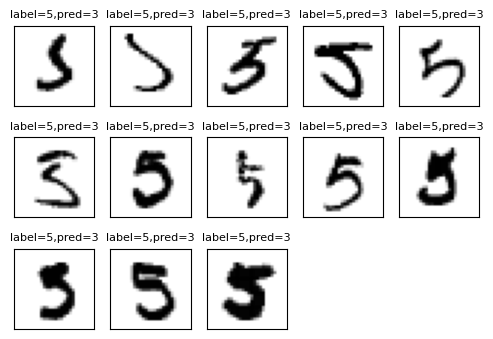

In [ ]:
# print(list(df[(df.label==5)&(df.predict==3)].index))
fig=plt.gcf()
fig.set_size_inches(6,7)#整個大圖的尺寸
for i in df[(df.label==5)&(df.predict==3)].index:
  ax=plt.subplot(5,5,1+list(df[(df.label==5)&(df.predict==3)].index).index(i)) #子圖形五行五列 第幾個 如果寫num-i會倒過來
  ax.imshow(x_test_image[i],cmap="binary")
  title="label="+str(y_test_label[i])
  title+=",pred="+str(predicted_classes[i])
  ax.set_title(title,fontsize=8)
  ax.set_xticks([]) #不顯示刻度
  ax.set_yticks([])
plt.show()

最後我們發現儘管我們讓MLP模型可以不過擬合，整個模型的準確率仍然沒有提升，MLP模型有其極限，接下來開始學**CNN(卷積神經網絡)模型**